## Исследование уровня потребительской лояльности (NPS) для телекоммуникационной компании

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# подключаемся к базе данных 

try:
    path_to_db = 'C:/Users/Suntory1/Downloads/telecomm_csi (1).db'
except:
    path_to_db = '/datasets/telecomm_csi.db'

engine = create_engine(f'sqlite:///{path_to_db}', echo = False)


In [3]:
# запрашиваем данные
query = """
SELECT u.user_id, u.lt_day, 
        CASE
          WHEN lf.title='01 1' OR lf.title='02 2' OR lf.title='03 3' OR lf.title='04 4-6' OR lf.title='05 7-12' THEN 'новый'
          ELSE 'старый'
        END AS is_new,
        u.age, 
        CASE
          WHEN u.gender_segment=1 THEN 'жен'
          WHEN u.gender_segment=0 THEN 'муж'
        END AS gender_segment,
        u.os_name, u.cpe_type_name,
        l.country, l.city, 
        a.title AS age_segment,
        SUBSTR(t.title, 3) AS traffic_segment, 
        SUBSTR(lf.title, 3) AS lifetime_segment,
        u.nps_score,
        CASE
          WHEN u.nps_score=10 or u.nps_score=9 THEN 'сторонники'
          WHEN u.nps_score=8 or u.nps_score=7 THEN 'нейтралы'
          ELSE 'критики'
        END AS nps_group,
        CASE
          WHEN u.nps_score=10 or u.nps_score=9 THEN 1
          WHEN u.nps_score=8 or u.nps_score=7 THEN 0
          ELSE -1
        END AS loyalty
FROM user AS u
JOIN location AS l ON u.location_id=l.location_id
JOIN age_segment AS a ON u.age_gr_id=a.age_gr_id
JOIN traffic_segment AS t ON u.tr_gr_id=t.tr_gr_id
JOIN lifetime_segment AS lf ON u.lt_gr_id=lf.lt_gr_id
"""

In [4]:
# сохраняем полученный датафрейм
network_data = pd.read_sql(query, engine) 

In [5]:
network_data

,user_id,lt_day,is_new,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group,loyalty
0,A001A2,2320,старый,45.0,жен,ANDROID,SMARTPHONE,Россия,Уфа,05 45-54,1-5,36+,10,сторонники,1
1,A001WF,2344,старый,53.0,муж,ANDROID,SMARTPHONE,Россия,Киров,05 45-54,1-5,36+,10,сторонники,1
2,A003Q7,467,старый,57.0,муж,ANDROID,SMARTPHONE,Россия,Москва,06 55-64,20-25,13-24,10,сторонники,1
3,A004TB,4190,старый,44.0,жен,IOS,SMARTPHONE,Россия,РостовнаДону,04 35-44,0.1-1,36+,10,сторонники,1
4,A004XT,1163,старый,24.0,муж,ANDROID,SMARTPHONE,Россия,Рязань,02 16-24,5-10,36+,10,сторонники,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502488,ZZZKLD,1249,старый,54.0,жен,ANDROID,SMARTPHONE,Россия,Москва,05 45-54,1-5,36+,5,критики,-1
502489,ZZZLWY,129,новый,31.0,муж,ANDROID,SMARTPHONE,Россия,Москва,03 25-34,1-5,4-6,8,нейтралы,0
502490,ZZZQ5F,522,старый,36.0,муж,ANDROID,SMARTPHONE,Россия,Сургут,04 35-44,25-30,13-24,10,сторонники,1
502491,ZZZQ8E,2936,старый,37.0,жен,ANDROID,SMARTPHONE,Россия,УланУдэ,04 35-44,65-70,36+,9,сторонники,1


In [6]:
# cохраним полученный датафрейм в формате csv
network_data.to_csv('network_data_v5.csv', index=False)

Ссылка на дашборд:
https://public.tableau.com/app/profile/ann.zh5606/viz/Assembled_project2_v7/Dashboard1?publish=yes




lifetime_segment                   1     13-24         2     25-36         3  \
gender_segment age_segment                                                     
жен            01 до 16          NaN  0.017857  0.500000  0.076923  0.111111   
               02 16-24          NaN  0.087361  0.245045  0.019798  0.236111   
               03 25-34     1.000000  0.214059  0.316308  0.145153  0.359766   
               04 35-44     0.333333  0.332435  0.450846  0.277917  0.431775   
               05 45-54     1.000000  0.438341  0.516770  0.360275  0.584877   
               06 55-64          NaN  0.518766  0.644828  0.475520  0.555066   
               07 66 +           NaN  0.565394  0.540000  0.559633  0.531915   
               08 n/a       1.000000  0.500000       NaN -0.333333       NaN   
муж            01 до 16          NaN  0.041096  0.000000 -0.092308  0.357143   
               02 16-24          NaN  0.059398  0.182390 -0.030520  0.211240   
               03 25-34     0.000000  0.153785  0.285943  0.087561  0.291468   
               04 35-44     0.333333  0.308812  0.371588  0.217884  0.400000   
               05 45-54     1.000000  0.376032  0.536913  0.311503  0.493590   
               06 55-64     1.000000  0.427167  0.393548  0.392430  0.540146   
               07 66 +           NaN  0.473451  0.673913  0.387205  0.696970   
               08 n/a       0.000000 -0.333333 -1.000000 -1.000000       NaN   

lifetime_segment                 36+       4-6      7-12  
gender_segment age_segment                                
жен            01 до 16    -0.106383  0.222222  0.200000  
               02 16-24    -0.065762  0.271100  0.164977  
               03 25-34     0.027744  0.319668  0.291300  
               04 35-44     0.175038  0.449479  0.390759  
               05 45-54     0.300104  0.546698  0.484736  
               06 55-64     0.417602  0.584660  0.583396  
               07 66 +      0.536269  0.537143  0.640898  
               08 n/a      -0.285714       NaN  1.000000  
муж            01 до 16    -0.286765  0.058824  0.000000  
               02 16-24    -0.104258  0.205832  0.186634  
               03 25-34    -0.042019  0.274569  0.237321  
               04 35-44     0.100904  0.375661  0.368573  
               05 45-54     0.223342  0.417763  0.448566  
               06 55-64     0.334850  0.572482  0.469546  
               07 66 +      0.437282  0.573913  0.544444  
               08 n/a      -0.538462 -0.500000 -1.000000

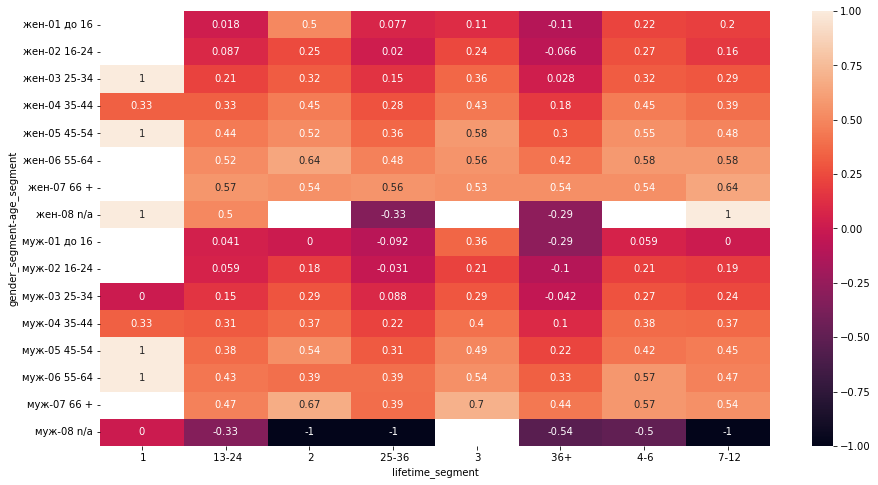

In [7]:
# Код ревьюера
import seaborn as sns
import matplotlib.pyplot as plt
d = network_data.assign(total_nps=lambda row: row['nps_group'].map({'сторонники': 1, 'нейтралы': 0, 'критики': -1}))\
  .pivot_table(index=['gender_segment', 'age_segment'], columns=['lifetime_segment'], values='total_nps', aggfunc='mean')
display(d)
plt.figure(figsize=(15,8))
sns.heatmap(d, annot=True);

Ссылка на презентацию: 
https://disk.yandex.ru/i/LWyp9rvTSpjo2w
